<ul><font size = 6 color='#663399'>
Learning Goals</font>
<font color = '#663399'>
<ul>We are using the same dataset as the previous laboratory exercise, now you need to build Neural networks</ul>

<li>Build three different networks using:</li>
different layers, activation functions, neurons per layers, number of layers
<li>Train your network and set the optimal number of epochs and batch size</li>
<li>Evaluate the three networks on the same test dataset</li>
<li>Compare the results</li>
</ul>

The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/tunguz/us-elections-dataset
1.  https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
2.  https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019
3.  https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction
4.  https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
5.  https://www.kaggle.com/anmolkumar/house-price-prediction-challenge
6.  https://www.kaggle.com/datasets/tadhgfitzgerald/fifa-international-soccer-mens-ranking-1993now
7.  https://www.kaggle.com/arslanali4343/real-estate-dataset
8.  https://www.kaggle.com/terenceshin/covid19s-impact-on-airport-traffic
9.  https://www.kaggle.com/arslanali4343/top-personality-dataset







In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<font size = 6 color='#663399'>1. Data Preparation</font>

In [2]:
import pandas as pd 

In [3]:
data = pd.read_csv('/content/drive/MyDrive/3fifa_ranking.csv')

In [4]:
data.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


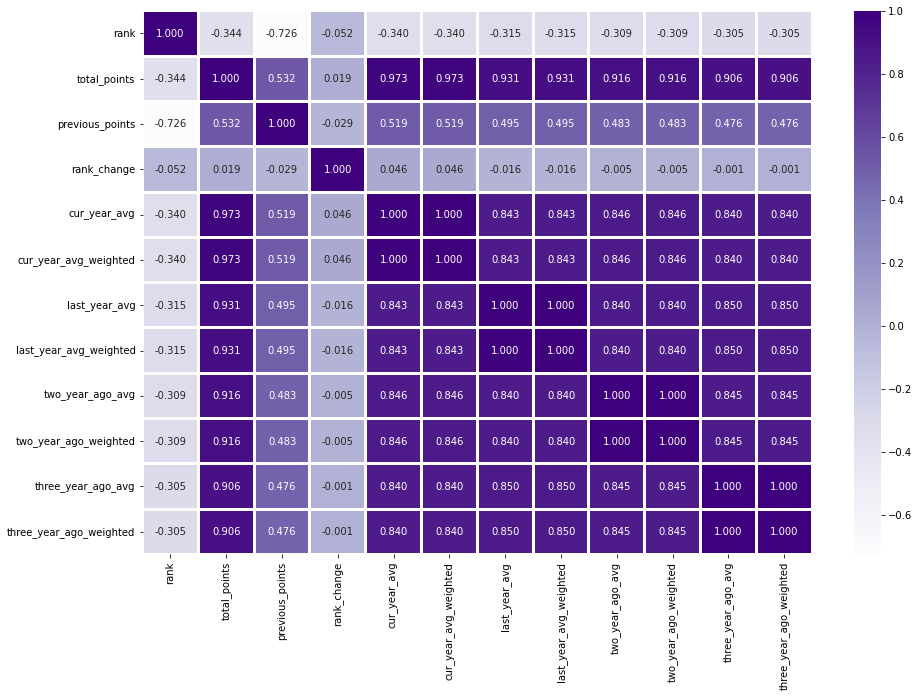

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='Purples', fmt='.3f', linewidths=2)
plt.show()

> <font size = 5 color='#663399'>Choosing the important features and target column</font>


In [6]:
feature_cols = ['total_points', 'previous_points', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 
                'two_year_ago_avg', 'two_year_ago_weighted','three_year_ago_avg','three_year_ago_weighted']

X = data[feature_cols] 
print(X.shape)

(57793, 10)


In [7]:
feature_cols = ['rank']
Y = data[feature_cols]
print(Y.shape)

(57793, 1)


In [31]:
X

,total_points,previous_points,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
0,0.0,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
57788,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57789,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57790,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57791,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
Y

,rank
0,1
1,2
2,3
3,4
4,5
...,...
57788,206
57789,206
57790,206
57791,206


> <font size = 5 color='#663399'>Splitting the dataset</font>


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,  Y, test_size=0.2) 

> <font size = 5 color='#663399'>Normalization of data</font>


In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

> <font size = 5 color='#663399'>Defining custom loss functions for regression in Keras</font>

In [152]:
# root mean squared error (rmse) for regression
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# mean squared error (mse) for regression
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)

# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))

<font size = 6 color='#663399'>2. Model 1 </font>



> <font size = 5 color='#663399'>2.1. Building</font>

In [102]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model1 = Sequential()

model1.add(Dense(16, input_dim=10, activation='relu'))

model1.add(Dense(8, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(4, activation='relu'))

model1.add(Dense(1, activation='linear'))

In [103]:
model1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 16)                176       
                                                                 
 dense_89 (Dense)            (None, 8)                 136       
                                                                 
 dense_90 (Dense)            (None, 8)                 72        
                                                                 
 dense_91 (Dense)            (None, 4)                 36        
                                                                 
 dense_92 (Dense)            (None, 1)                 5         
                                                                 
Total params: 425
Trainable params: 425
Non-trainable params: 0
_________________________________________________________________


In [108]:
model1.compile(optimizer='Nadam', loss='mean_squared_error', metrics=['mean_squared_error', rmse, r_square])

In [109]:
history1 = model1.fit(X_train, Y_train, epochs=30, batch_size=20, verbose=1, validation_split=0.2)

Epoch 1/30
1850/1850 [==============================] - 6s 3ms/step - loss: 3604.9990 - mean_squared_error: 3604.9990 - rmse: 43.5050 - r_square: -0.1389 - val_loss: 1457.0310 - val_mean_squared_error: 1457.0310 - val_rmse: 25.5979 - val_r_square: 0.5519
Epoch 2/30
1850/1850 [==============================] - 5s 3ms/step - loss: 1403.1118 - mean_squared_error: 1403.1118 - rmse: 25.0697 - r_square: 0.5608 - val_loss: 1324.7417 - val_mean_squared_error: 1324.7418 - val_rmse: 23.7056 - val_r_square: 0.5939
Epoch 3/30
1850/1850 [==============================] - 5s 2ms/step - loss: 1290.9066 - mean_squared_error: 1290.9065 - rmse: 23.4480 - r_square: 0.5960 - val_loss: 1224.6339 - val_mean_squared_error: 1224.6339 - val_rmse: 22.1321 - val_r_square: 0.6251
Epoch 4/30
1850/1850 [==============================] - 5s 3ms/step - loss: 1206.0236 - mean_squared_error: 1206.0236 - rmse: 22.3360 - r_square: 0.6246 - val_loss: 1147.2980 - val_mean_squared_error: 1147.2981 - val_rmse: 21.6282 - val_

> <font size = 5 color='#663399'>2.2. Evaluating</font>


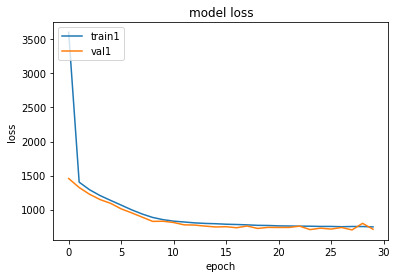

In [110]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train1', 'val1'], loc='upper left')
plt.show()

In [111]:
y_pred1 = model1.predict(X_test) 

362/362 [==============================] - 1s 1ms/step


In [112]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test,y_pred1)
print("r_square score: ", r2_score(Y_test, y_pred1))

r_square score:  0.7931575301801873


<font size = 6 color='#663399'>3. Model 2</font>

> <font size = 5 color='#663399'>3.1. Building</font>

In [118]:
model2 = Sequential()

model2.add(Dense(256, kernel_initializer='uniform', activation='relu', input_dim=10))
model2.add(Dropout(0.1, input_shape=(256,)))

model2.add(Dense(64, kernel_initializer='uniform', activation='relu'))
model2.add(Dense(128, kernel_initializer='uniform', activation='relu'))
model2.add(Dense(128, kernel_initializer='uniform', activation='relu'))
model2.add(Dense(128, kernel_initializer='uniform', activation='relu'))

model2.add(Dense(1, activation='linear'))

In [119]:
model2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 256)               2816      
                                                                 
 dropout_33 (Dropout)        (None, 256)               0         
                                                                 
 dense_94 (Dense)            (None, 64)                16448     
                                                                 
 dense_95 (Dense)            (None, 128)               8320      
                                                                 
 dense_96 (Dense)            (None, 128)               16512     
                                                                 
 dense_97 (Dense)            (None, 128)               16512     
                                                                 
 dense_98 (Dense)            (None, 1)               

In [120]:
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error', rmse, r_square])

In [145]:
history2 = model2.fit(X_train, Y_train, epochs=20, batch_size=8, validation_split=0.2)

Epoch 1/20
4624/4624 [==============================] - 19s 4ms/step - loss: 748.4755 - mean_squared_error: 748.4755 - rmse: 16.4602 - r_square: 0.7330 - val_loss: 715.4689 - val_mean_squared_error: 715.4689 - val_rmse: 16.3064 - val_r_square: 0.7557
Epoch 2/20
4624/4624 [==============================] - 16s 3ms/step - loss: 743.0106 - mean_squared_error: 743.0106 - rmse: 16.3819 - r_square: 0.7319 - val_loss: 714.9180 - val_mean_squared_error: 714.9180 - val_rmse: 15.9682 - val_r_square: 0.7586
Epoch 3/20
4624/4624 [==============================] - 17s 4ms/step - loss: 740.1741 - mean_squared_error: 740.1741 - rmse: 16.3348 - r_square: 0.7361 - val_loss: 669.1841 - val_mean_squared_error: 669.1841 - val_rmse: 15.3066 - val_r_square: 0.7712
Epoch 4/20
4624/4624 [==============================] - 17s 4ms/step - loss: 739.7982 - mean_squared_error: 739.7982 - rmse: 16.3754 - r_square: 0.7362 - val_loss: 772.0555 - val_mean_squared_error: 772.0555 - val_rmse: 16.8648 - val_r_square: 0.7

> <font size = 5 color='#663399'>3.2. Evaluating</font>

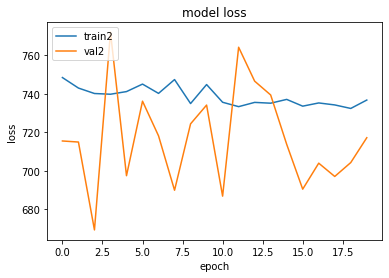

In [146]:
import matplotlib.pyplot as plt

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train2','val2'], loc='upper left')
plt.show()

In [147]:
y_pred2 = model2.predict(X_test) 

362/362 [==============================] - 1s 2ms/step


In [148]:
from sklearn.metrics import r2_score
r2_3 = r2_score(Y_test, y_pred2)
print("r_square score: ", r2_score(Y_test, y_pred2))

r_square score:  0.794446071192733


<font size = 6 color='#663399'>4. Model 3</font>

> <font size = 5 color='#663399'>4.1. Building</font>

In [126]:
model3 = Sequential()

model3.add(Dense(16, input_dim=10,activation ='relu'))
model2.add(Dropout(0.1, input_shape=(16,)))

model3.add(Dense(256,activation ='relu'))
model2.add(Dropout(0.1, input_shape=(256,)))
model3.add(Dense(128, activation ='relu'))
model2.add(Dropout(0.1, input_shape=(128,)))
model3.add(Dense(64,activation ='relu'))
model2.add(Dropout(0.1, input_shape=(64,)))

model3.add(Dense(1, activation ='linear'))    

In [127]:
model3.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 16)                176       
                                                                 
 dense_100 (Dense)           (None, 256)               4352      
                                                                 
 dense_101 (Dense)           (None, 128)               32896     
                                                                 
 dense_102 (Dense)           (None, 64)                8256      
                                                                 
 dense_103 (Dense)           (None, 1)                 65        
                                                                 
Total params: 45,745
Trainable params: 45,745
Non-trainable params: 0
_________________________________________________________________


In [128]:
model3.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', rmse, r_square])

In [129]:
history3 = model3.fit(X_train, Y_train, epochs=40, batch_size=24,  verbose=1, validation_split=0.2)

Epoch 1/40
1542/1542 [==============================] - 6s 3ms/step - loss: 1653.5698 - mean_squared_error: 1653.5698 - rmse: 27.2385 - r_square: 0.4925 - val_loss: 1058.7341 - val_mean_squared_error: 1058.7341 - val_rmse: 21.7601 - val_r_square: 0.6815
Epoch 2/40
1542/1542 [==============================] - 5s 3ms/step - loss: 914.0311 - mean_squared_error: 914.0311 - rmse: 20.0195 - r_square: 0.7215 - val_loss: 838.7874 - val_mean_squared_error: 838.7874 - val_rmse: 18.1328 - val_r_square: 0.7497
Epoch 3/40
1542/1542 [==============================] - 8s 5ms/step - loss: 793.0936 - mean_squared_error: 793.0936 - rmse: 17.8342 - r_square: 0.7565 - val_loss: 769.1821 - val_mean_squared_error: 769.1821 - val_rmse: 17.7486 - val_r_square: 0.7687
Epoch 4/40
1542/1542 [==============================] - 10s 6ms/step - loss: 771.5193 - mean_squared_error: 771.5193 - rmse: 17.4385 - r_square: 0.7644 - val_loss: 781.6497 - val_mean_squared_error: 781.6497 - val_rmse: 18.1104 - val_r_square: 0.

> <font size = 5 color='#663399'>4.2. Evaluating</font>

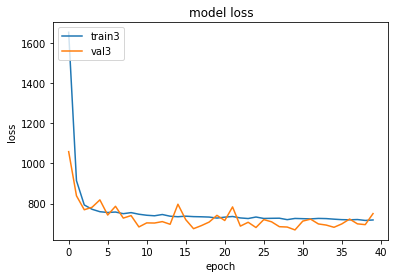

In [130]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train3', 'val3'], loc='upper left')
plt.show()

In [131]:
y_pred3 = model3.predict(X_test)    

362/362 [==============================] - 1s 2ms/step


In [132]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(Y_test, y_pred3))

r_square score:  0.7835823417051807


<font size = 5 color='#663399'>5. Compare The Results</font>

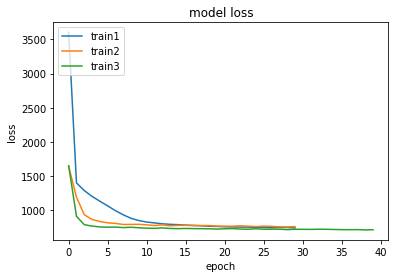

In [135]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train1','train2','train3'], loc='upper left')
plt.show()

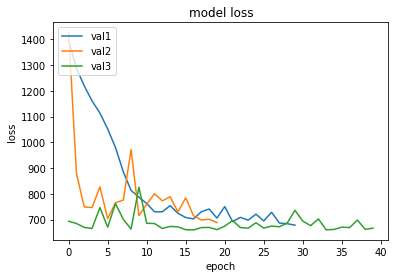

In [92]:
import matplotlib.pyplot as plt
plt.plot(history1.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val1','val2','val3'], loc='upper left')
plt.show()

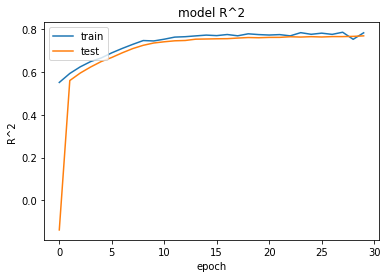

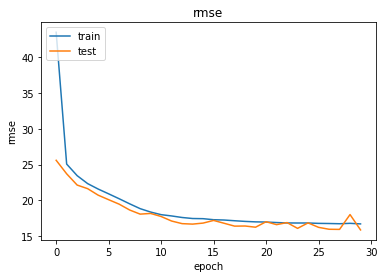

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


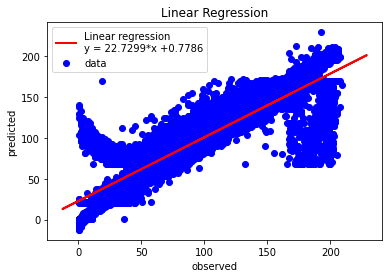



Mean absolute error (MAE):      15.950596
Mean squared error (MSE):       706.735386
Root mean squared error (RMSE): 26.584495
R square (R^2):                 0.793158


In [151]:
#training curve for R^2 (the scale starts very low negative)
plt.plot(history1.history['val_r_square'])
plt.plot(history1.history['r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
           
#training curve for rmse
plt.plot(history1.history['rmse'])
plt.plot(history1.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# linear regression and datapoints
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(Y_test, y_pred1)  
y_fit = regressor.predict(y_pred1) 

reg_intercept = round(regressor.intercept_[0],4)
reg_coef = round(regressor.coef_.flatten()[0],4)
reg_label = "y = " + str(reg_intercept) + "*x +" + str(reg_coef)

plt.scatter(Y_test, y_pred1, color='blue', label= 'data')
plt.plot(y_pred1, y_fit, color='red', linewidth=2, label = 'Linear regression\n'+reg_label) 
plt.title('Linear Regression')
plt.legend()
plt.xlabel('observed')
plt.ylabel('predicted')
plt.show()


import sklearn.metrics, math
print("\n")
print("Mean absolute error (MAE):      %f" % sklearn.metrics.mean_absolute_error(Y_test,y_pred1))
print("Mean squared error (MSE):       %f" % sklearn.metrics.mean_squared_error(Y_test,y_pred1))
print("Root mean squared error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(Y_test,y_pred1)))
print("R square (R^2):                 %f" % sklearn.metrics.r2_score(Y_test,y_pred1))

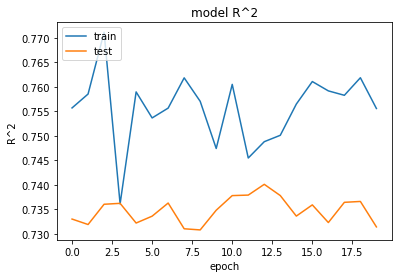

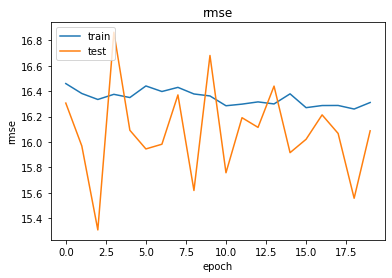

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


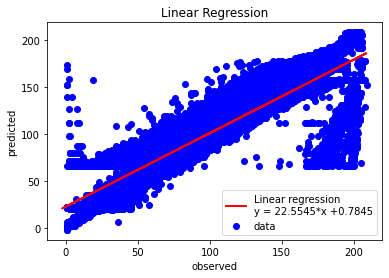



Mean absolute error (MAE):      16.176898
Mean squared error (MSE):       702.332724
Root mean squared error (RMSE): 26.501561
R square (R^2):                 0.794446


In [150]:
#training curve for R^2 (the scale starts very low negative)
plt.plot(history2.history['val_r_square'])
plt.plot(history2.history['r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
           
# training curve for rmse
plt.plot(history2.history['rmse'])
plt.plot(history2.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#linear regression and datapoints
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(Y_test, y_pred2)  
y_fit = regressor.predict(y_pred2) 

reg_intercept = round(regressor.intercept_[0],4)
reg_coef = round(regressor.coef_.flatten()[0],4)
reg_label = "y = " + str(reg_intercept) + "*x +" + str(reg_coef)

plt.scatter(Y_test, y_pred2, color='blue', label= 'data')
plt.plot(y_pred2, y_fit, color='red', linewidth=2, label = 'Linear regression\n'+reg_label) 
plt.title('Linear Regression')
plt.legend()
plt.xlabel('observed')
plt.ylabel('predicted')
plt.show()


import sklearn.metrics, math
print("\n")
print("Mean absolute error (MAE):      %f" % sklearn.metrics.mean_absolute_error(Y_test,y_pred2))
print("Mean squared error (MSE):       %f" % sklearn.metrics.mean_squared_error(Y_test,y_pred2))
print("Root mean squared error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(Y_test,y_pred2)))
print("R square (R^2):                 %f" % sklearn.metrics.r2_score(Y_test,y_pred2))

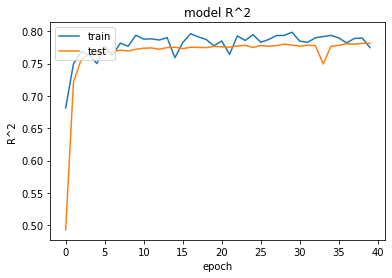

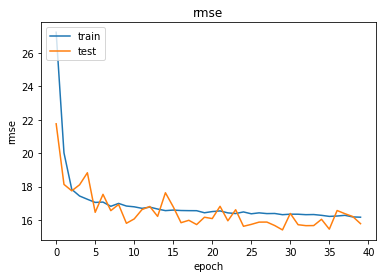

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


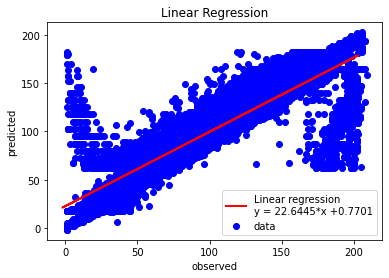



Mean absolute error (MAE):      15.882474
Mean squared error (MSE):       739.451707
Root mean squared error (RMSE): 27.192861
R square (R^2):                 0.783582


In [149]:
# training curve for R^2 (the scale starts very low negative)
plt.plot(history3.history['val_r_square'])
plt.plot(history3.history['r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
           
# training curve for rmse
plt.plot(history3.history['rmse'])
plt.plot(history3.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# linear regression and datapoints
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(Y_test, y_pred3)  
y_fit = regressor.predict(y_pred3) 

reg_intercept = round(regressor.intercept_[0],4)
reg_coef = round(regressor.coef_.flatten()[0],4)
reg_label = "y = " + str(reg_intercept) + "*x +" + str(reg_coef)

plt.scatter(Y_test, y_pred3, color='blue', label= 'data')
plt.plot(y_pred3, y_fit, color='red', linewidth=2, label = 'Linear regression\n'+reg_label) 
plt.title('Linear Regression')
plt.legend()
plt.xlabel('observed')
plt.ylabel('predicted')
plt.show()


import sklearn.metrics, math
print("\n")
print("Mean absolute error (MAE):      %f" % sklearn.metrics.mean_absolute_error(Y_test,y_pred3))
print("Mean squared error (MSE):       %f" % sklearn.metrics.mean_squared_error(Y_test,y_pred3))
print("Root mean squared error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(Y_test,y_pred3)))
print("R square (R^2):                 %f" % sklearn.metrics.r2_score(Y_test,y_pred3))